In [ ]:
Customer Churn Analysis- Telecom Dataset

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [8]:
df = pd.read_csv ('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()    #collecting the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#for replacing the blanks with 0 as tenure is 0 and no total charges are recorded.

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()   #this will check if any cell has null values or not.

0

In [17]:
df.describe()   #to get the description little bit

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df.duplicated().sum()   #to check if any duplicates are there

0

In [21]:
df["customerID"].duplicated().sum()   #to check if any duplicate customer are there

0

In [25]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)     #to convert the senior citizen to 1 else "no"

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


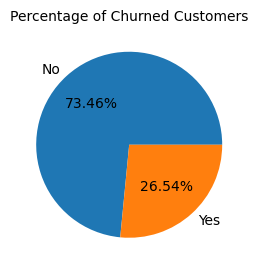

In [56]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

from the given pie chart we can conclude that 26.54% of our customers are churned out.
now lets explore the reason behind it

Churning as per Tenure of being the subscription

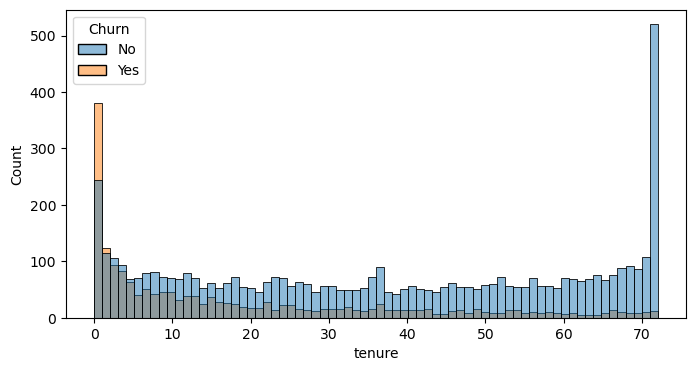

In [105]:
plt.figure(figsize=(8,4))
sns.histplot(x="tenure", data=df, bins=70, hue ="Churn")  #we can distribute in total tenure bins to understand nicely the churning.
plt.show()

people who have used our product for long time, has stayed and people who have used our services 1-2 months has churned out.

In [111]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Customer Demographics & Churn

1) Does gender influence churn? (e.g., Are male or female customers more likely to leave?)

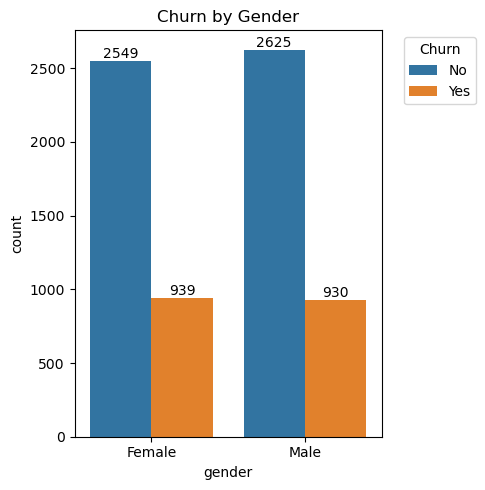

In [164]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="gender", data=df, hue="Churn")

# Add labels for all bars (both "No" and "Yes")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Churn by Gender")

# move legend to the right, outside the plot
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


Gender does not significantly influence churn.

This means retention strategies should not be designed based on gender differences

2) Are senior citizens more prone to churn compared to younger customers?

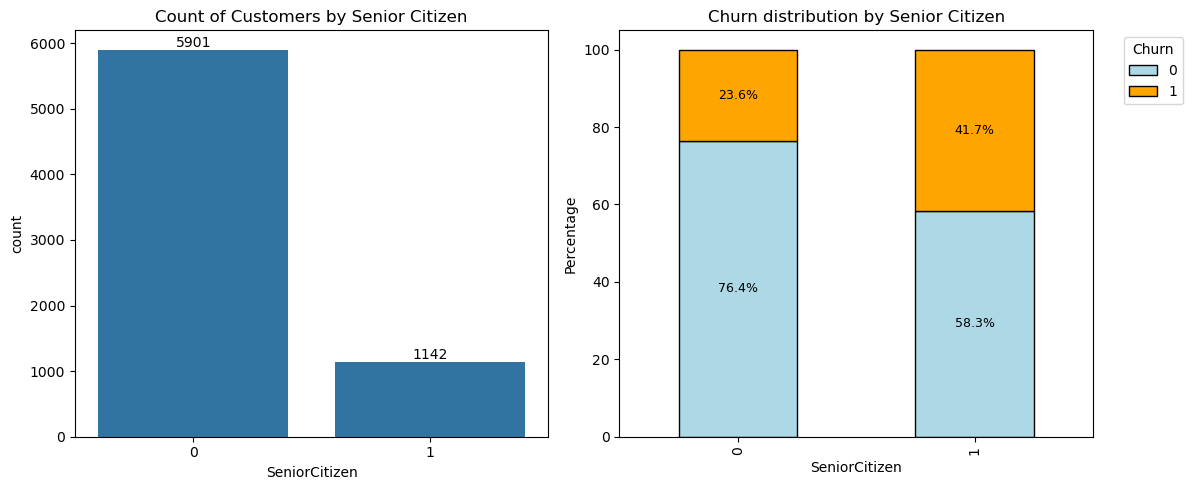

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# 1️⃣ Countplot
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title("Count of Customers by Senior Citizen")

# 2️⃣ Stacked bar of churn percentages
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100
ct.plot(kind="bar", stacked=True, ax=axes[1], color=["lightblue","orange"], edgecolor="black")

# Add labels inside bars
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            axes[1].text(
                bar.get_x() + bar.get_width()/2.,
                bar.get_y() + height/2.,
                f"{height:.1f}%",
                ha="center", va="center", color="black", fontsize=9
            )

axes[1].set_title("Churn distribution by Senior Citizen")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()



Senior citizens, though a smaller share of the customer base, show a relatively higher churn rate—likely due to price sensitivity, 
limited perceived value in add-on services, and tech-related challenges.
To address this, telecoms can offer senior-friendly affordable plans, provide better digital support, and 
bundle essential services tailored to their needs.


3)Does having a partner or dependents reduce churn (due to higher family bundle usage)?

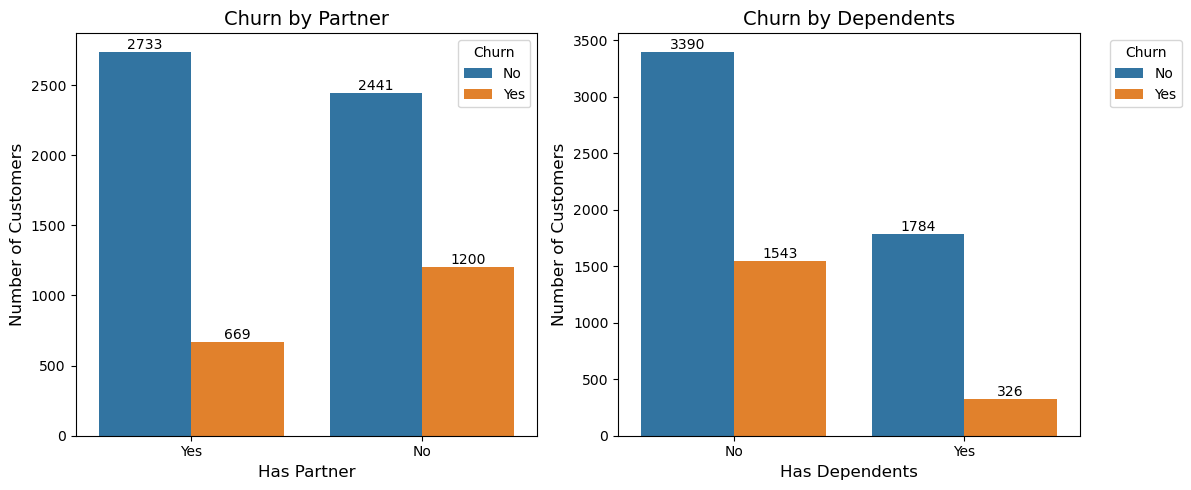

In [179]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

# Churn by Partner
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[0])
axes[0].set_title("Churn by Partner", fontsize=14)
axes[0].set_xlabel("Has Partner", fontsize=12)
axes[0].set_ylabel("Number of Customers", fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Churn by Dependents
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1])
axes[1].set_title("Churn by Dependents", fontsize=14)
axes[1].set_xlabel("Has Dependents", fontsize=12)
axes[1].set_ylabel("Number of Customers", fontsize=12)
for container in axes[1].containers:
    axes[1].bar_label(container)

# Legend outside
axes[1].legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


Insights: Customers with a partner or dependents churn less, likely due to bundled/family usage increasing stickiness.
Action: Telecoms can promote family/partner bundle plans and discounts to retain single/independent customers.

Service-Related Churn

1) Do customers with PhoneService only churn less compared to those with InternetService?

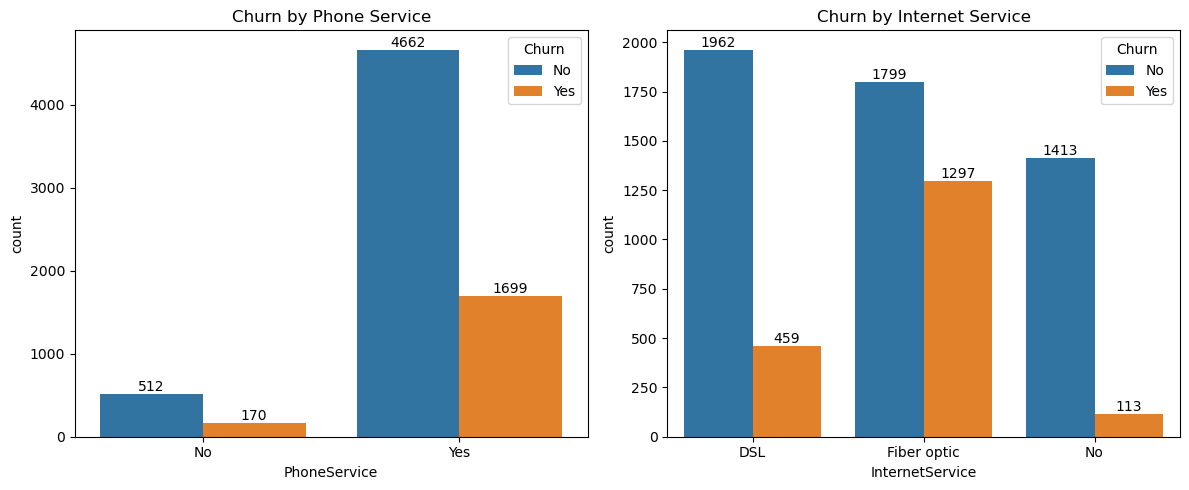

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Subplot 1: PhoneService
plt.subplot(1,2,1)
ax1 = sns.countplot(x="PhoneService", hue="Churn", data=df)
for container in ax1.containers:
    ax1.bar_label(container)
plt.title("Churn by Phone Service")
plt.legend(title="Churn")

# Subplot 2: InternetService
plt.subplot(1,2,2)
ax2 = sns.countplot(x="InternetService", hue="Churn", data=df)
for container in ax2.containers:
    ax2.bar_label(container)
plt.title("Churn by Internet Service")
plt.legend(title="Churn")

plt.tight_layout()
plt.show()


Insights:
PhoneService only customers churn less compared to those with InternetService.
Fiber optic Internet users show the highest churn, signaling dissatisfaction with pricing or service quality.

Action: 
Telecom should improve Fiber optic service quality or pricing to retain high-value internet customers.

In [ ]:
2) Do value-added services like OnlineSecurity, OnlineBackup, or TechSupport reduce churn?

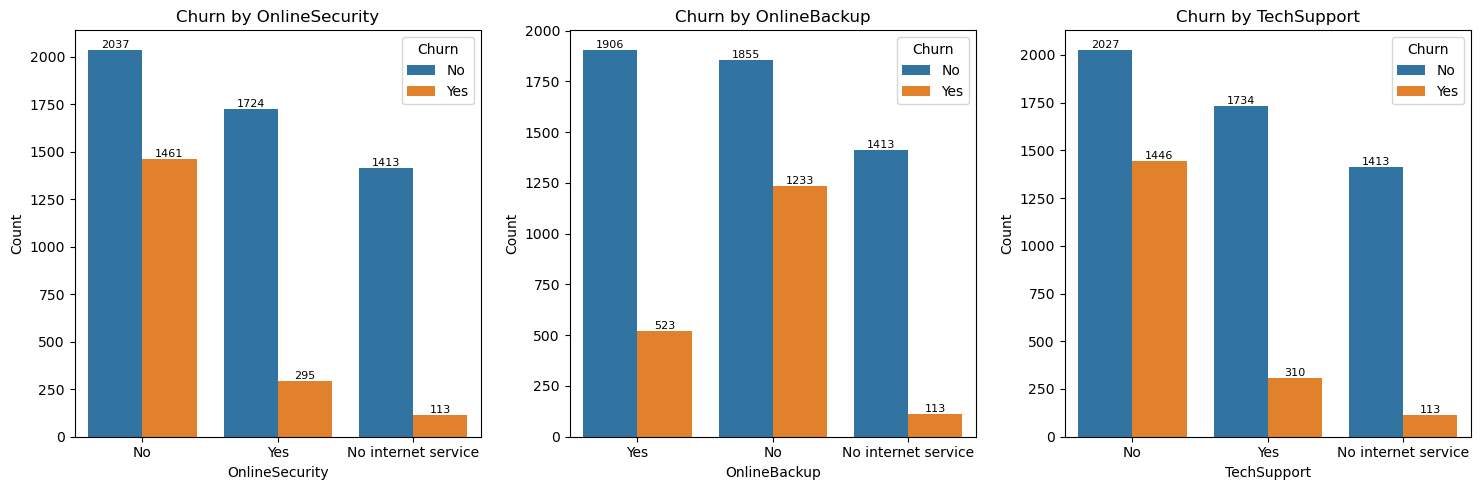

In [190]:
features = ["OnlineSecurity", "OnlineBackup", "TechSupport"]

plt.figure(figsize=(15,5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=col, data=df, hue="Churn")
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)
    plt.title(f"Churn by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


Customers who subscribe to OnlineSecurity, OnlineBackup, or TechSupport churn less compared to those who don’t.
The telecom should promote bundled packages with these services to improve retention and reduce churn.

In [ ]:
3)Are customers with StreamingTV or StreamingMovies more loyal than those without?

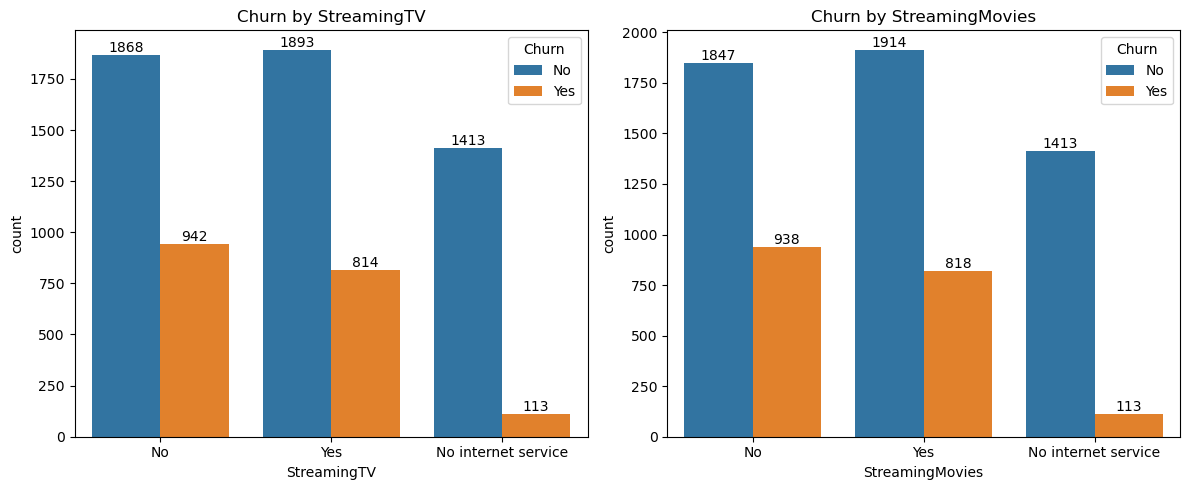

In [191]:
plt.figure(figsize=(12,5))

# StreamingTV vs Churn
ax1 = plt.subplot(1,2,1)
sns.countplot(x="StreamingTV", data=df, hue="Churn", ax=ax1)
ax1.set_title("Churn by StreamingTV")
for container in ax1.containers:
    ax1.bar_label(container)

# StreamingMovies vs Churn
ax2 = plt.subplot(1,2,2)
sns.countplot(x="StreamingMovies", data=df, hue="Churn", ax=ax2)
ax2.set_title("Churn by StreamingMovies")
for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout()
plt.show()


Contract & Billing Impact

In [ ]:
1)What type of contract (Month-to-Month, One year, Two year) leads to the highest churn?

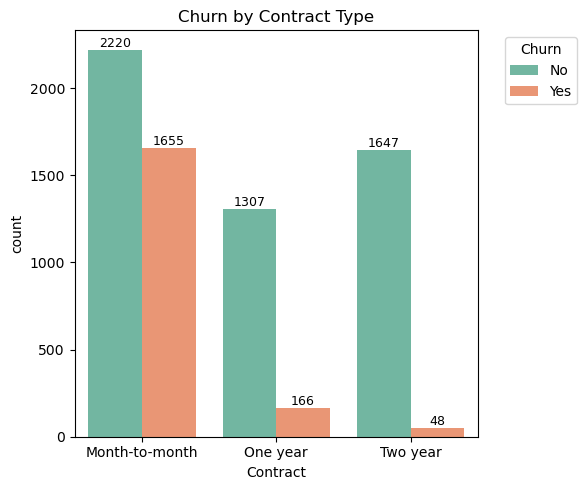

In [192]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette="Set2")

# Add data labels for all bars
for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Churn by Contract Type")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Customers with Month-to-Month contracts churn the most.

Action: Offer incentives like discounts, free add-ons, or loyalty points to encourage them to switch to yearly or two-year contracts.

In [ ]:
2) Does PaperlessBilling affect churn compared to traditional billing?

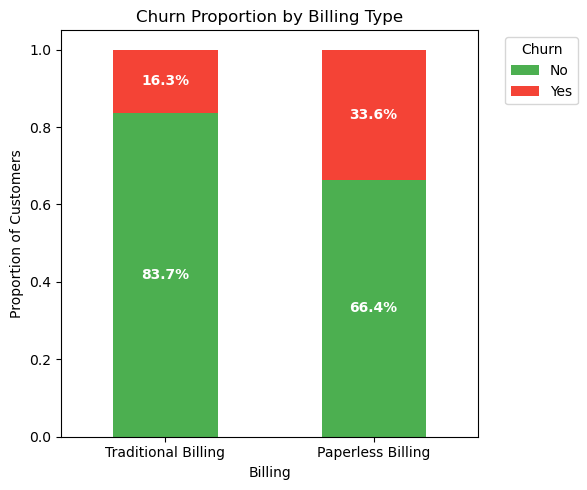

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate proportion of churn within each billing type
billing_churn = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()

# Plot 100% stacked bar chart
ax = billing_churn.plot(kind='bar', stacked=True, figsize=(6,5), color=['#4CAF50','#F44336'])

# Add data labels
for i, row in enumerate(billing_churn.values):
    bottom = 0
    for val in row:
        ax.text(i, bottom + val/2, f'{val*100:.1f}%', ha='center', va='center', color='white', fontweight='bold')
        bottom += val

# Customize plot
ax.set_xticks([0,1])
ax.set_xticklabels(["Traditional Billing", "Paperless Billing"], rotation=0)

plt.ylabel("Proportion of Customers")
plt.title("Churn Proportion by Billing Type")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Insights:
Paperless Billing customers may show higher churn proportion than traditional billing. 
Traditional billing customers might have more loyalty, indicated by lower churn percentage.

Business Actions:
For Paperless Billing customers:Offer incentives (discounts, loyalty points) to reduce churn. Send reminders or engagement emails to increase retention.
For High-churn segments:Identify overlapping features (e.g., month-to-month contracts + paperless billing) to target retention campaigns.

3) Which payment method (Credit card, Bank transfer, Electronic check, etc.) has the highest churn rates?

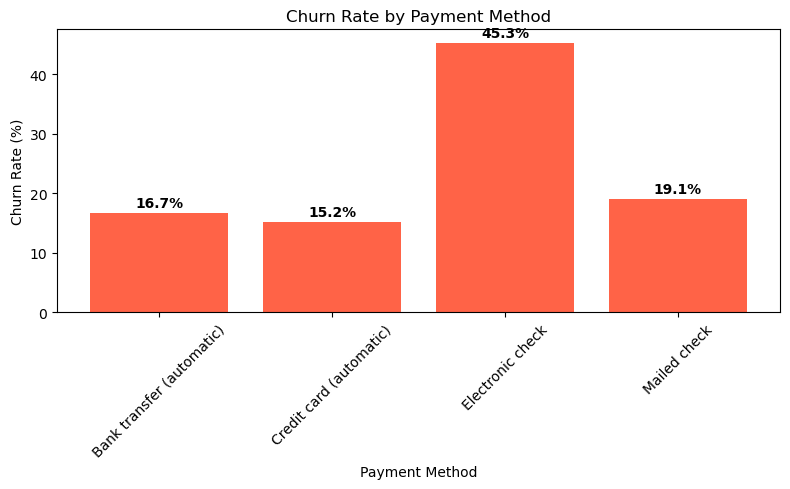

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate churn rate for each payment method
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100

# Plot churn rates using matplotlib
plt.figure(figsize=(8,5))
bars = plt.bar(payment_churn.index, payment_churn.values, color='tomato')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontweight='bold')

plt.ylabel("Churn Rate (%)")
plt.xlabel("Payment Method")
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
Electronic Check has the highest churn, while Credit Card and Bank Transfer show lower churn rates.

Action:
Target Electronic Check users with retention campaigns, such as automated reminders or incentives, to reduce churn.

Cross-Feature Insights

1) Do month-to-month customers with Fiber Optic Internet have a higher churn compared to DSL on yearly contracts?

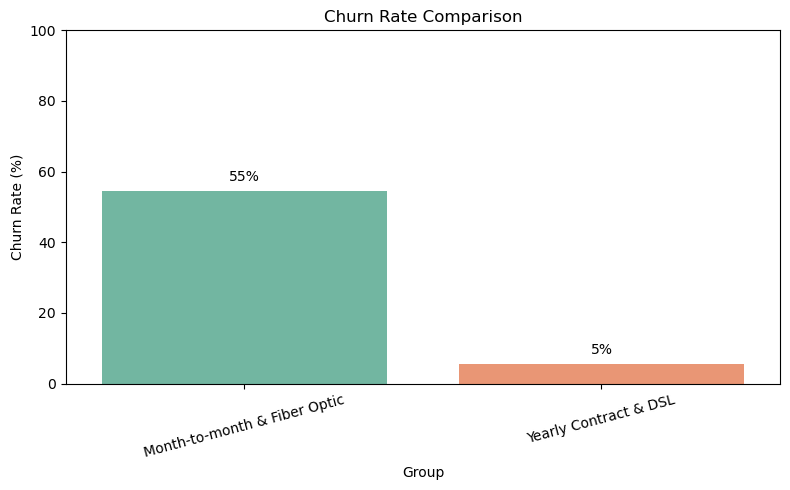

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('customer_churn.csv')  # Update the path as needed

# Convert 'Churn' column to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define the customer groups
group_1 = df[(df['Contract'] == 'Month-to-month') & (df['InternetService'] == 'Fiber optic')]
group_2 = df[(df['Contract'].isin(['One year', 'Two year'])) & (df['InternetService'] == 'DSL')]

# Calculate churn rates
churn_rate_1 = group_1['Churn'].mean() * 100  # convert to %
churn_rate_2 = group_2['Churn'].mean() * 100  # convert to %

# Create DataFrame for plotting
churn_data = pd.DataFrame({
    'Group': ['Month-to-month & Fiber Optic', 'Yearly Contract & DSL'],
    'Churn Rate (%)': [churn_rate_1, churn_rate_2]
})

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Group', y='Churn Rate (%)', data=churn_data, hue='Group', palette='Set2', legend=False)

# Add percentage labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=5)

# Final touches
plt.title('Churn Rate Comparison')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Insights
Month-to-month fiber optic customers churn at much higher rates than those on long-term DSL contracts, 
likely due to service expectations and the ease of leaving flexible plans.

Actions
Offer loyalty discounts, improve fiber service quality, and launch targeted retention efforts 
(e.g., bundles, exit surveys) to retain high-risk fiber users on month-to-month contracts.

2)Are senior citizens with no dependents and month-to-month contracts at greater risk of churn?

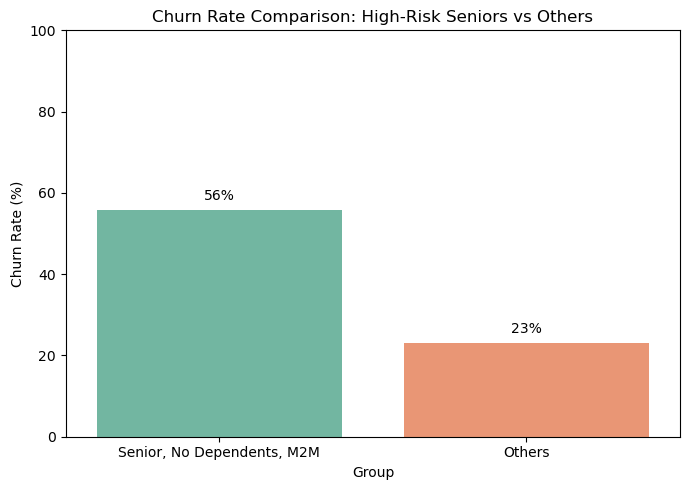

In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn.csv')  # Update with your file path

# Convert 'Churn' to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define groups
group_a = df[(df['SeniorCitizen'] == 1) &
             (df['Dependents'] == 'No') &
             (df['Contract'] == 'Month-to-month')]

group_b = df[~((df['SeniorCitizen'] == 1) &
               (df['Dependents'] == 'No') &
               (df['Contract'] == 'Month-to-month'))]

# Calculate churn rate in %
churn_rate_a = group_a['Churn'].mean() * 100
churn_rate_b = group_b['Churn'].mean() * 100

# Create summary DataFrame
churn_data = pd.DataFrame({
    'Group': ['Senior, No Dependents, M2M', 'Others'],
    'Churn Rate (%)': [churn_rate_a, churn_rate_b]
})

# Plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Group', y='Churn Rate (%)', data=churn_data, hue='Group', palette='Set2', legend=False)

# Add % labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=5)

# Styling
plt.title('Churn Rate Comparison: High-Risk Seniors vs Others')
plt.ylim(0, 100)
plt.ylabel('Churn Rate (%)')
plt.tight_layout()
plt.show()


Insights
Senior citizens with no dependents on month-to-month contracts show significantly higher churn, 
indicating they're a high-risk group likely due to lack of long-term incentives or household stickiness.

Actions
Retention Offers: Provide personalized discounts or longer-term plan incentives to high-risk seniors.
Customer Support: Proactively engage with these customers through support calls or check-ins.
Simplified Bundles: Offer easy-to-understand, essential service bundles suited for independent senior users.

3)Does the combination of TechSupport + OnlineSecurity significantly reduce churn?

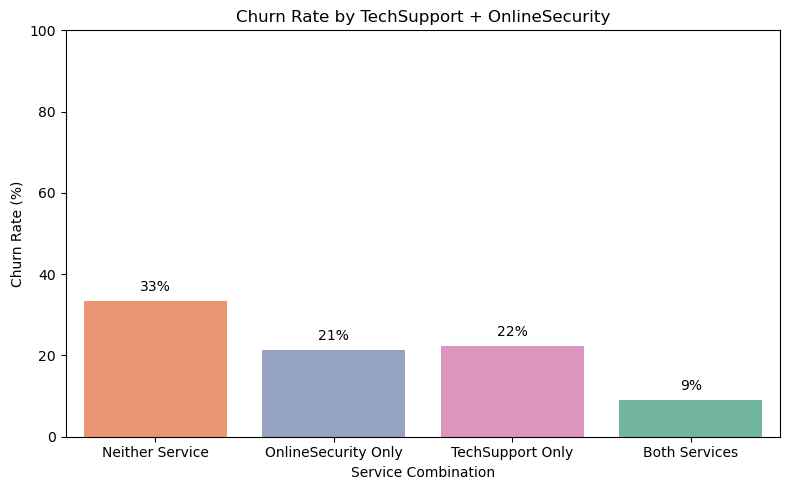

In [216]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn.csv')  # Replace with your actual path

# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define service combination group
def label_service(row):
    if row['TechSupport'] == 'Yes' and row['OnlineSecurity'] == 'Yes':
        return 'Both Services'
    elif row['TechSupport'] == 'Yes':
        return 'TechSupport Only'
    elif row['OnlineSecurity'] == 'Yes':
        return 'OnlineSecurity Only'
    else:
        return 'Neither Service'

df['ServiceCombo'] = df.apply(label_service, axis=1)

# Calculate churn rate per group (%)
churn_rates = df.groupby('ServiceCombo')['Churn'].mean().reset_index()
churn_rates['Churn Rate (%)'] = churn_rates['Churn'] * 100

# Sort order
order = ['Neither Service', 'OnlineSecurity Only', 'TechSupport Only', 'Both Services']

# Plot (fixed warning by using hue + legend=False)
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='ServiceCombo',
    y='Churn Rate (%)',
    hue='ServiceCombo',
    data=churn_rates,
    order=order,
    palette='Set2',
    legend=False
)

# Add % labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=5)

# Final touches
plt.title('Churn Rate by TechSupport + OnlineSecurity')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Service Combination')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


Insights:
Customers using both TechSupport and OnlineSecurity churn significantly less than those using neither. Even one of these services reduces churn, but the combination is most effective.

Actions:
Bundle Both Services: Promote discounted bundles that include both TechSupport and OnlineSecurity.
Retention Campaigns: Target high-risk customers without these services and offer trials or incentives.
Highlight Value: Market the protective and support benefits to new and existing users, especially those with month-to-month contracts.

Retention & Business Strategy

In [ ]:
1) Which customer segments (by age, contract type, service type) should the company target with retention offers?

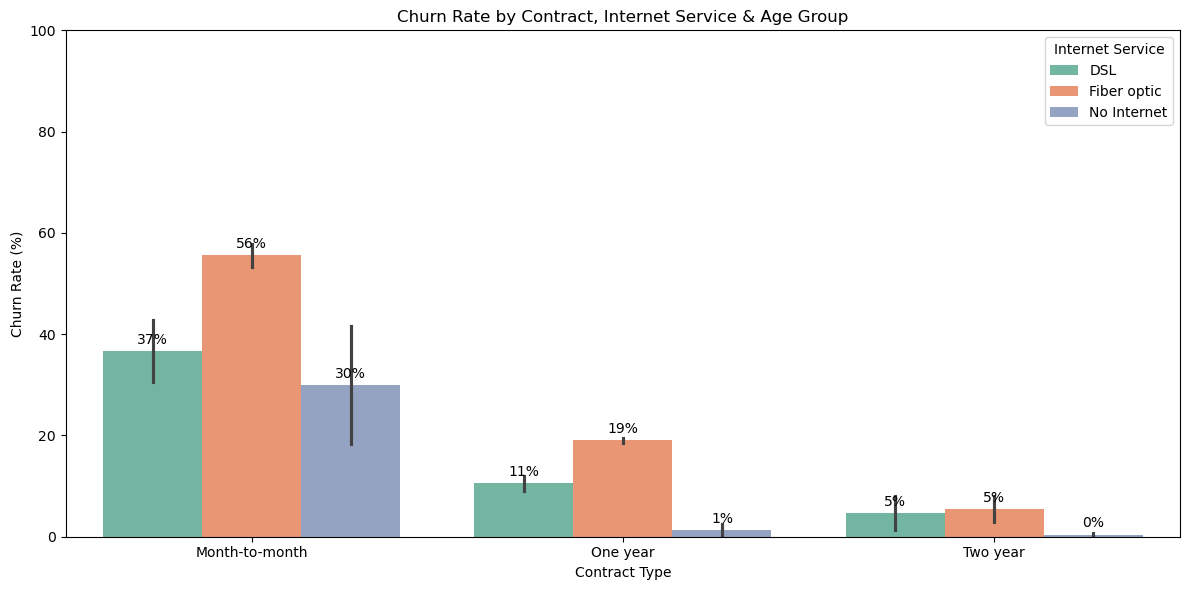

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn.csv')  # Replace with actual path

# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create age group
df['AgeGroup'] = df['SeniorCitizen'].map({1: 'Senior', 0: 'Non-Senior'})

# Clean up service types if needed
df['InternetService'] = df['InternetService'].replace({'No': 'No Internet'})

# Group by AgeGroup + Contract + InternetService and compute churn rate
grouped = df.groupby(['AgeGroup', 'Contract', 'InternetService'])['Churn'].mean().reset_index()
grouped['Churn Rate (%)'] = grouped['Churn'] * 100

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=grouped,
    x='Contract',
    y='Churn Rate (%)',
    hue='InternetService',
    palette='Set2'
)

# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3)

# Styling
plt.title('Churn Rate by Contract, Internet Service & Age Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.legend(title='Internet Service')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [218]:
# Optional: See raw churn table for deeper inspection
pd.set_option('display.max_rows', None)
display(grouped.sort_values(by='Churn Rate (%)', ascending=False))


,AgeGroup,Contract,InternetService,Churn,Churn Rate (%)
10,Senior,Month-to-month,Fiber optic,0.578616,57.861635
1,Non-Senior,Month-to-month,Fiber optic,0.532172,53.217158
9,Senior,Month-to-month,DSL,0.427673,42.767296
11,Senior,Month-to-month,No Internet,0.416667,41.666667
0,Non-Senior,Month-to-month,DSL,0.306391,30.639098
4,Non-Senior,One year,Fiber optic,0.195181,19.518072
13,Senior,One year,Fiber optic,0.185484,18.548387
2,Non-Senior,Month-to-month,No Internet,0.183594,18.359375
12,Senior,One year,DSL,0.120000,12.000000
3,Non-Senior,One year,DSL,0.090385,9.038462


Insights:
Seniors on Month-to-Month contracts with Fiber Optic internet show the highest churn.
Non-seniors on long-term DSL contracts are more stable.
No Internet users also show lower churn—likely due to fewer expectations or simpler plans.

Actions:
Target high-churn groups (e.g., Seniors + Fiber + Month-to-Month) with loyalty offers, better support, or plan upgrades.
Encourage long-term contracts for Fiber users via discounts or add-ons.
Use personalized messaging for high-risk segments, emphasizing reliability, cost savings, and dedicated support.

2)Can we predict high-risk churn groups and design incentives (discounts, free services) to retain them?

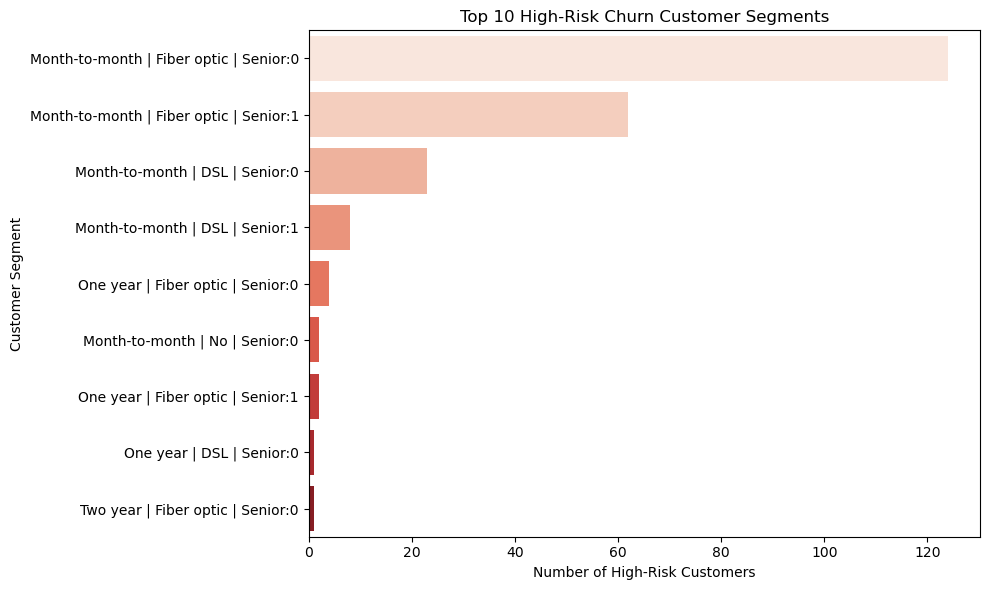

In [222]:
# Prepare the combined segment label for y-axis and hue
high_risk_summary['SegmentLabel'] = (
    high_risk_summary['Contract'] + ' | ' + 
    high_risk_summary['InternetService'] + ' | Senior:' + 
    high_risk_summary['SeniorCitizen'].astype(str)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=high_risk_summary.sort_values('Count', ascending=False).head(10),
    x='Count',
    y='SegmentLabel',
    hue='SegmentLabel',    # assign y variable to hue to suppress warning
    palette='Reds',
    legend=False           # no duplicate legend
)
plt.title('Top 10 High-Risk Churn Customer Segments')
plt.xlabel('Number of High-Risk Customers')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.show()


Insights:
The model flags high churn risk in customers with month-to-month contracts, fiber optic internet, 
and senior citizen status—key segments for focused retention.

Actions:
Target these groups with personalized incentives like discounts or free services, proactively engage before renewal, 
and use ongoing scoring to adapt retention strategies.

3) What is the lifetime value impact if high-churn groups (e.g., fiber optic, month-to-month, e-check) are not retained?

   HighRiskGroup  MonthlyCharges     Churn  Count  LifetimeMonths         LTV
0          False       59.652807  0.188285   5736        5.311111  316.822685
1           True       87.182938  0.603673   1307        1.656527  144.420913


C:\Users\RAJDEEP_CHAKRABORTY\AppData\Local\Temp\ipykernel_9924\3311023867.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HighRiskGroup', y='LTV', data=grouped, palette='pastel')


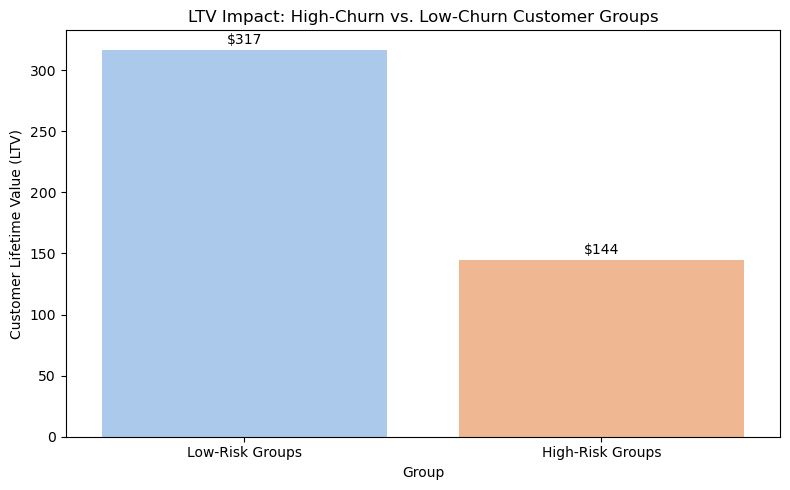

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update path as needed)
df = pd.read_csv('customer_churn.csv')

# Encode churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Clarify InternetService 'No' as 'No Internet'
df['InternetService'] = df['InternetService'].replace({'No': 'No Internet'})

# Define high-risk group: Fiber optic + Month-to-month + Electronic check payment
df['HighRiskGroup'] = (
    (df['InternetService'] == 'Fiber optic') &
    (df['Contract'] == 'Month-to-month') &
    (df['PaymentMethod'] == 'Electronic check')
)

# Aggregate metrics per group
grouped = df.groupby('HighRiskGroup').agg({
    'MonthlyCharges': 'mean',
    'Churn': 'mean',
    'customerID': 'count'
}).rename(columns={'customerID': 'Count'}).reset_index()

# Estimate average customer lifetime in months (avoid division by zero)
grouped['LifetimeMonths'] = grouped['Churn'].apply(lambda x: 1/x if x > 0 else 60)  # cap at 60 months

# Calculate LTV = MonthlyCharges * LifetimeMonths
grouped['LTV'] = grouped['MonthlyCharges'] * grouped['LifetimeMonths']

print(grouped)

# Plot LTV comparison
plt.figure(figsize=(8,5))
sns.barplot(x='HighRiskGroup', y='LTV', data=grouped, palette='pastel')
plt.xticks([0,1], ['Low-Risk Groups', 'High-Risk Groups'])
plt.xlabel('Group')
plt.ylabel('Customer Lifetime Value (LTV)')
plt.title('LTV Impact: High-Churn vs. Low-Churn Customer Groups')

# Add data labels
for i, val in enumerate(grouped['LTV']):
    plt.text(i, val + 5, f"${val:.0f}", ha='center')

plt.tight_layout()
plt.show()


Insights:
High-risk groups (Fiber optic + Month-to-month + Electronic check) have lower LTV due to high churn, leading to significant revenue loss if not retained.

Actions:
Focus retention efforts on these segments, improve service and contracts to reduce churn, and track LTV to evaluate retention success.